## House Price Prediction dataset taken from `https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data`

In [67]:
# !unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [68]:
import pandas as pd

In [69]:
house_df = pd.read_csv('train.csv')

In [70]:
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [71]:
house_df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


<Axes: >

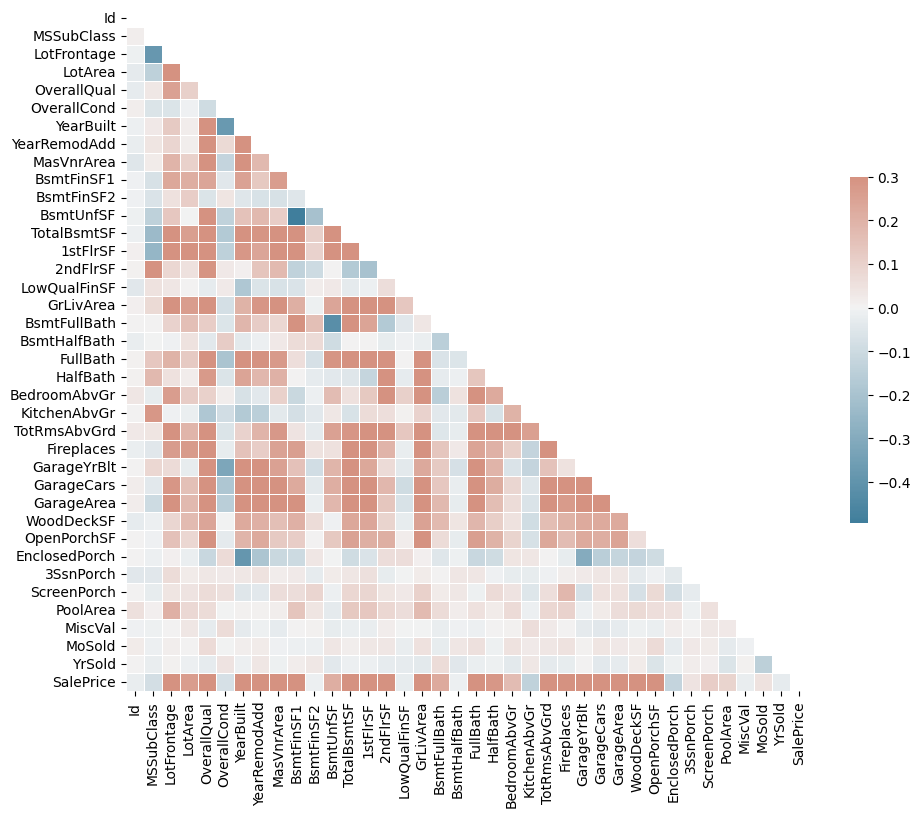

In [72]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
### I will just use the columns at random but in the lab work please see what
### relationship there is between target variable and other attribute
numeric_df = house_df.select_dtypes(['int64', 'float64'])

corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<ipython-input-73-f6ab0e3193d7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


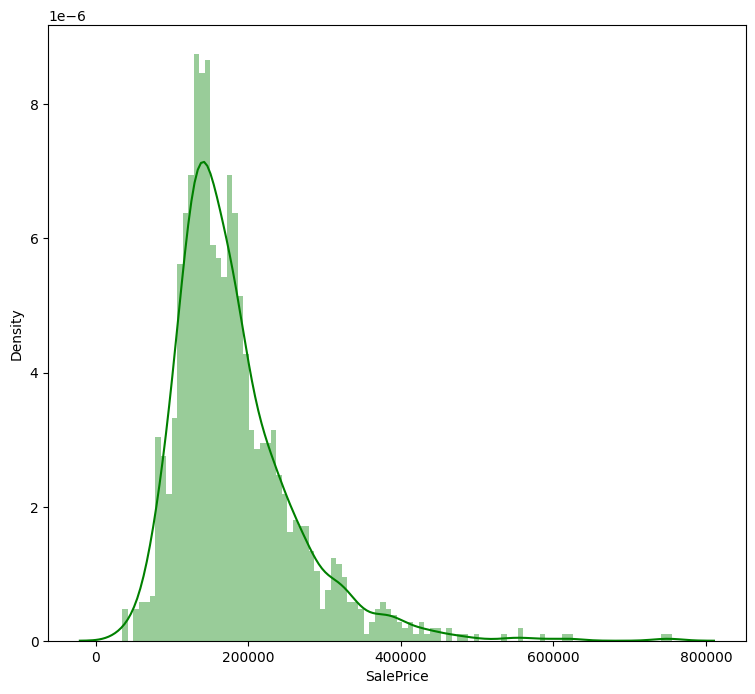

In [73]:
plt.figure(figsize=(9, 8))
sns.distplot(house_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

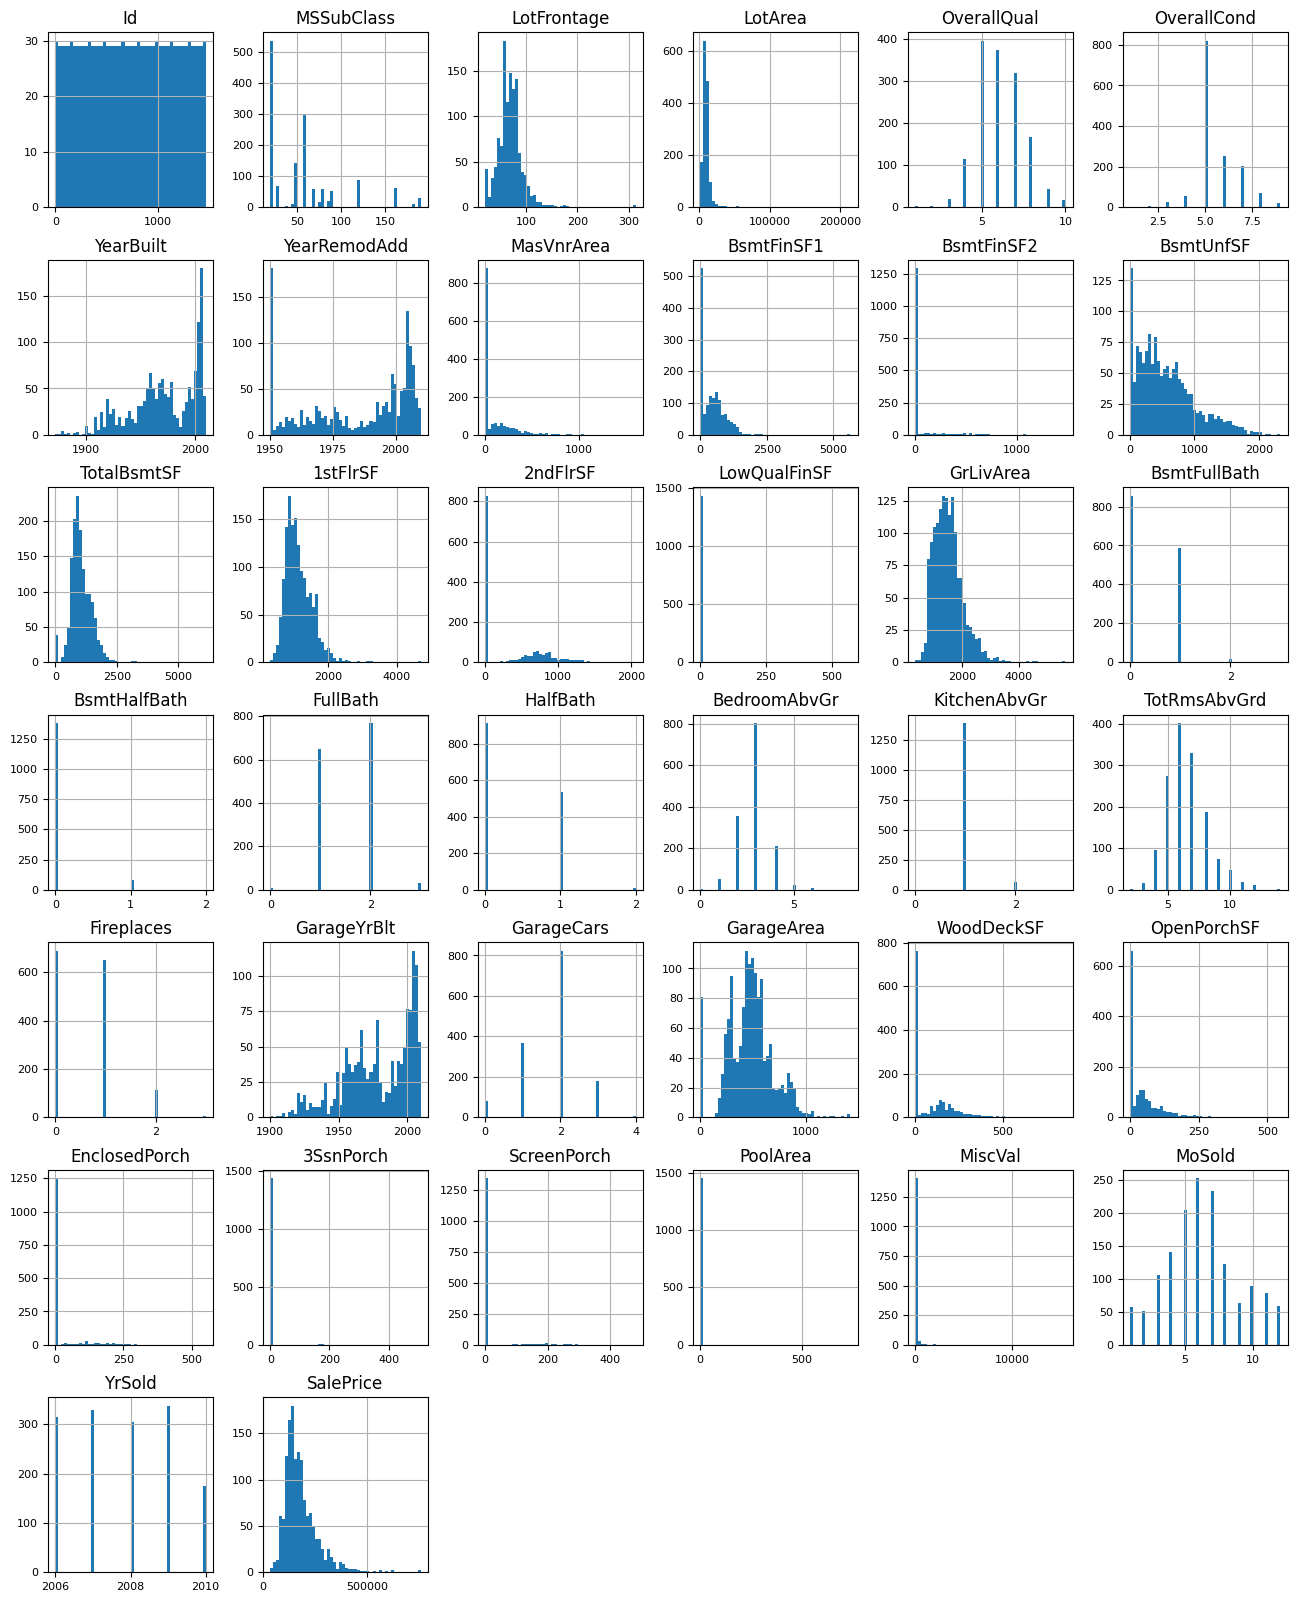

In [74]:
numeric_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [75]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
columns = ['MSSubClass', 'MSZoning', 'LotArea','LotFrontage', 'LotShape', 'Street','SaleCondition', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']

In [77]:
house_df[columns].head()

,MSSubClass,MSZoning,LotArea,LotFrontage,LotShape,Street,SaleCondition,OverallQual,YearBuilt,YearRemodAdd,...,2ndFlrSF,GrLivArea,FullBath,HalfBath,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,60,RL,8450,65.0,Reg,Pave,Normal,7,2003,2003,...,854,1710,2,1,2003.0,2,548,0,61,208500
1,20,RL,9600,80.0,Reg,Pave,Normal,6,1976,1976,...,0,1262,2,0,1976.0,2,460,298,0,181500
2,60,RL,11250,68.0,IR1,Pave,Normal,7,2001,2002,...,866,1786,2,1,2001.0,2,608,0,42,223500
3,70,RL,9550,60.0,IR1,Pave,Abnorml,7,1915,1970,...,756,1717,1,0,1998.0,3,642,0,35,140000
4,60,RL,14260,84.0,IR1,Pave,Normal,8,2000,2000,...,1053,2198,2,1,2000.0,3,836,192,84,250000


In [78]:
house_df[columns].isna().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotFrontage,259
LotShape,0
Street,0
SaleCondition,0
OverallQual,0
YearBuilt,0
YearRemodAdd,0


In [79]:
null_cols = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

for col in null_cols:
    house_df[col].fillna(house_df[col].mean(), inplace=True)

<ipython-input-79-caa3c8083d9b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_df[col].fillna(house_df[col].mean(), inplace=True)


In [80]:
house_df[columns].isna().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotFrontage,0
LotShape,0
Street,0
SaleCondition,0
OverallQual,0
YearBuilt,0
YearRemodAdd,0


In [81]:
X = house_df[['MSSubClass', 'MSZoning', 'LotArea','LotFrontage', 'LotShape', 'Street','SaleCondition', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]
Y = house_df['SalePrice']

In [82]:
X

,MSSubClass,MSZoning,LotArea,LotFrontage,LotShape,Street,SaleCondition,OverallQual,YearBuilt,YearRemodAdd,...,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,60,RL,8450,65.0,Reg,Pave,Normal,7,2003,2003,...,856,854,1710,2,1,2003.0,2,548,0,61
1,20,RL,9600,80.0,Reg,Pave,Normal,6,1976,1976,...,1262,0,1262,2,0,1976.0,2,460,298,0
2,60,RL,11250,68.0,IR1,Pave,Normal,7,2001,2002,...,920,866,1786,2,1,2001.0,2,608,0,42
3,70,RL,9550,60.0,IR1,Pave,Abnorml,7,1915,1970,...,961,756,1717,1,0,1998.0,3,642,0,35
4,60,RL,14260,84.0,IR1,Pave,Normal,8,2000,2000,...,1145,1053,2198,2,1,2000.0,3,836,192,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,62.0,Reg,Pave,Normal,6,1999,2000,...,953,694,1647,2,1,1999.0,2,460,0,40
1456,20,RL,13175,85.0,Reg,Pave,Normal,6,1978,1988,...,2073,0,2073,2,0,1978.0,2,500,349,0
1457,70,RL,9042,66.0,Reg,Pave,Normal,7,1941,2006,...,1188,1152,2340,2,0,1941.0,1,252,0,60
1458,20,RL,9717,68.0,Reg,Pave,Normal,5,1950,1996,...,1078,0,1078,1,0,1950.0,1,240,366,0


In [83]:
X.isna().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotFrontage,0
LotShape,0
Street,0
SaleCondition,0
OverallQual,0
YearBuilt,0
YearRemodAdd,0


In [84]:
import matplotlib.pyplot as plt

In [85]:
import seaborn as sns

<ipython-input-86-e9dcc26ed7ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['LotFrontage']) #only works for old version of seaborn use different method histplot/kdeplot


<Axes: xlabel='LotFrontage', ylabel='Density'>

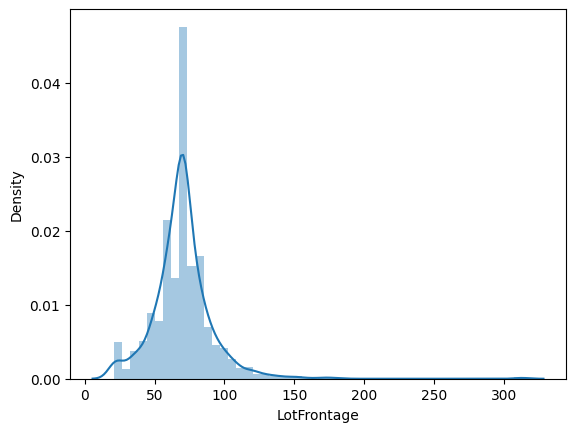

In [86]:
sns.distplot(X['LotFrontage']) #only works for old version of seaborn use different method histplot/kdeplot

In [87]:
median_lotfrontage = X['LotFrontage'].median()

In [88]:
median_lotfrontage

70.04995836802665

In [89]:
X['LotFrontage'].fillna(median_lotfrontage,inplace=True)

<ipython-input-89-ca9726a0c5bd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['LotFrontage'].fillna(median_lotfrontage,inplace=True)
<ipython-input-89-ca9726a0c5bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['LotFrontage'].fillna(median_lotfrontage,inplace=True)


In [90]:
X.isna().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotFrontage,0
LotShape,0
Street,0
SaleCondition,0
OverallQual,0
YearBuilt,0
YearRemodAdd,0


### In categorical values that needs to be converted to numerical form and
### In numerical values scale it down and split it

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
X.dtypes

,0
MSSubClass,int64
MSZoning,object
LotArea,int64
LotFrontage,float64
LotShape,object
Street,object
SaleCondition,object
OverallQual,int64
YearBuilt,int64
YearRemodAdd,int64


In [93]:
scaler = StandardScaler()

In [94]:
numerical_columns = ['MSSubClass', 'LotArea','LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
categorical_columns = ['MSZoning', 'LotShape', 'Street','SaleCondition']

In [95]:
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

<ipython-input-95-cb7cdb47f1f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


In [96]:
X['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [97]:
X['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [98]:
X['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [99]:
X['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [100]:
encoded_value = pd.get_dummies(X[categorical_columns], sparse=False).astype(int) #Alternative way to one hot encode categorical values

In [101]:
X = pd.concat([X, encoded_value],axis=1)

In [102]:
X.drop(columns=categorical_columns,inplace=True)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8)

In [104]:
X_train.shape, X_test.shape, X.shape

((1168, 36), (292, 36), (1460, 36))

## Define model for evaluation

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [106]:
linear = LinearRegression()
random_forest = RandomForestRegressor()

In [107]:
from sklearn.model_selection import KFold, cross_val_score

In [108]:
algorithms = [linear, random_forest]

In [109]:
algorithm_names = ['linear_regression', 'random forest']

In [110]:
kfold = KFold(n_splits=5, shuffle=True)

In [111]:
for i,model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score:{scores} - Mean Score{scores.mean()}")

linear_regression - Score:[-1.02688362e+09 -1.47332768e+09 -2.85422088e+09 -9.47078572e+08
 -1.50245785e+09] - Mean Score-1560793720.2089233
random forest - Score:[-6.34254723e+08 -1.49475153e+09 -5.53717701e+08 -1.25223134e+09
 -8.05098016e+08] - Mean Score-948010663.7559055


In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
param_grid = {
    'max_depth':[5,10,15],
    'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
}

In [114]:
grid = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error')

In [115]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             scoring='neg_mean_squared_error')

In [116]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 11}

In [117]:
grid.best_score_

-952854163.2083702

In [118]:
yhat = grid.predict(X_test)

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
mean_squared_error(y_test, yhat)

674499445.7271372

In [121]:
rf = grid.best_estimator_

In [122]:
rf.feature_importances_

array([2.23487517e-03, 1.63126416e-02, 7.86446822e-03, 5.65746555e-01,
       1.10634195e-02, 1.39303711e-02, 5.68856760e-03, 2.83416752e-02,
       3.84127177e-02, 2.46239340e-02, 5.42631552e-02, 1.09831676e-01,
       1.29365578e-03, 1.02920292e-03, 6.54701874e-03, 2.67570357e-02,
       5.95508356e-02, 8.16524694e-03, 8.34737969e-03, 4.72864434e-04,
       2.88807749e-04, 4.97098318e-05, 1.18677436e-03, 2.61996939e-03,
       3.86548875e-04, 1.61504808e-04, 7.48374244e-06, 1.08429694e-03,
       1.38070688e-05, 1.20365826e-06, 6.12056197e-04, 0.00000000e+00,
       2.26699342e-05, 1.12559084e-03, 1.17657771e-03, 7.85702989e-04])

In [123]:
sorted_idx = rf.feature_importances_.argsort()

<BarContainer object of 36 artists>

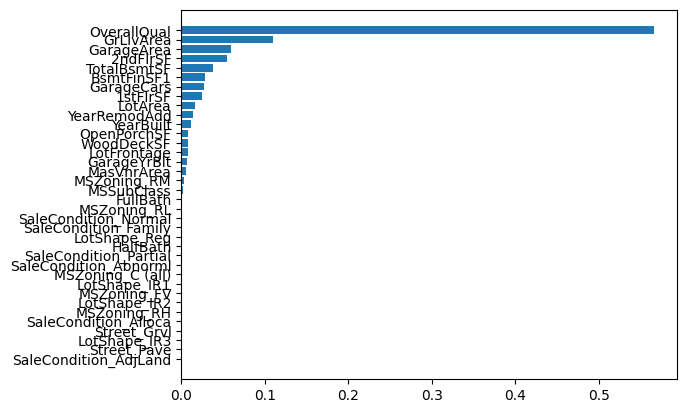

In [124]:
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])

# Replicate this in LeaveOneOut

In [134]:
# Code here
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

random_forest = RandomForestRegressor()

param_grid = {
    'max_depth': [5, 10],
    'n_estimators': [5, 10, 15]
}

grid = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=loo, scoring='neg_mean_squared_error')

In [135]:
grid.fit(X_train, y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'n_estimators': [5, 10, 15]},
             scoring='neg_mean_squared_error')

In [136]:
print(grid.best_params_)
print(grid.best_score_)

yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

{'max_depth': 10, 'n_estimators': 10}
-993319189.5942743


789141213.2074965

# Analyze

Analyze here the difference between the two and possible reasons why they are different:

The K-Fold took a minute with gridsearchcv to find best model parameters, while LeaveOneOut was taking a lot of time, thats why I reduced the number of param_grid parameters

LOO is an extreme case of KFold where k equals the number of samples in the dataset. Each sample is used as the test set exactly once, while the rest of the dataset (all other samples) is used for training.

KFold often has a balance between bias and variance, especially with a reasonably chosen value for k (like 5 or 10), while LOO gives a very low-bias estimate (since the model is almost always trained on the entire dataset), can suffer from high variance, meaning that test errors can fluctuate significantly between iterations, especially on noisy data.

It is recommended to use LOO when the dataset is small, since leaving out one sample at a time doesn't lose too much information, and the higher variance can be tolerable.

Experiment with types of K-Fold cross-validations.

In [138]:
#Code here
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

repeated_kfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200]
}

model = RandomForestRegressor()

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=repeated_kfold, scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

print("Best score:", grid.best_score_)
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

Best parameters: {'max_depth': 15, 'n_estimators': 200}
Best score: -1021803092.167171


650606371.9831071

In [137]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

tscv = TimeSeriesSplit(n_splits=5)

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [50, 100, 200]
}

model = RandomForestRegressor()

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print(grid.best_score_)

yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

Best parameters: {'max_depth': 10, 'n_estimators': 100}
-1169338831.673592


665601982.8576424

## Model this in Linear Regression (Conduct Grid Search for Ridge, Lasso)

In [139]:
#Code here
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import make_regression

ridge_param_grid = {
    'alpha': np.logspace(-3, 3, 7)  # Regularization strength
}

ridge_model = Ridge()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_grid = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid,
                          cv=kfold, scoring='neg_mean_squared_error')

ridge_grid.fit(X_train, y_train)

print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best score for Ridge:", ridge_grid.best_score_)

print("SCORE: ", ridge_grid.score(X_test, y_test))

Best parameters for Ridge: {'alpha': 100.0}
Best score for Ridge: -1606732817.4639132
SCORE:  -938248170.5369987


In [140]:
lasso_param_grid = {
    'alpha': np.logspace(-3, 3, 7)  # Regularization strength
}

lasso_model = Lasso()

lasso_grid = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid,
                          cv=kfold, scoring='neg_mean_squared_error')

lasso_grid.fit(X_train, y_train)

print("Best parameters for Lasso:", lasso_grid.best_params_)
print("Best score for Lasso:", lasso_grid.best_score_)
print("SCORE: ", lasso_grid.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.551e+11, tolerance: 5.429e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.065e+11, tolerance: 6.293e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.509e+11, tolerance: 5.749e

Best parameters for Lasso: {'alpha': 1000.0}
Best score for Lasso: -1599765745.3049054
SCORE:  -966231868.7686061


Analyze and state the difference with the two (if any)

Analyze here:
Ridge:

- Best suited for scenarios where all features are believed to contribute to the outcome, and there is multicollinearity among the features. For example, in cases like image processing or when dealing with polynomial regression.

Lasso:

- More effective in situations where feature selection is needed. It is beneficial when the model needs to be interpretable, or when you suspect that many features are irrelevant

Ridge and Lasso regression are valuable tools in the machine learning toolbox, each with its unique strengths. The choice between them often depends on the specific characteristics of the dataset and the goals of the analysis:

- Use Ridge when wee believe all features should contribute to the prediction, especially in the presence of multicollinearity.
- Use Lasso when we want to reduce the number of features by eliminating less important ones, leading to a simpler and more interpretable model.

## Try Lasso/ Ridge with a polynomial Feature

In [141]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_param_grid = {
    'alpha': np.logspace(-3, 3, 7)  # Regularization strength
}

ridge_model = Ridge()

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_grid = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid,
                          cv=kfold, scoring='neg_mean_squared_error')

ridge_grid.fit(X_train_poly, y_train)

print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best score for Ridge:", ridge_grid.best_score_)

print("SCORE: ", ridge_grid.score(X_test_poly, y_test))

Best parameters for Ridge: {'alpha': 1000.0}
Best score for Ridge: -1270653031.4742155
SCORE:  -640853884.7209431


In [142]:
lasso_param_grid = {
    'alpha': np.logspace(-3, 3, 7)  # Regularization strength
}

lasso_model = Lasso()

lasso_grid = GridSearchCV(estimator=lasso_model, param_grid=lasso_param_grid,
                          cv=kfold, scoring='neg_mean_squared_error')

lasso_grid.fit(X_train_poly, y_train)

print("Best parameters for Lasso:", lasso_grid.best_params_)
print("Best score for Lasso:", lasso_grid.best_score_)
print("SCORE: ", lasso_grid.score(X_test_poly, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.295e+11, tolerance: 5.429e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.364e+11, tolerance: 6.293e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.267e+11, tolerance: 5.749e

Best parameters for Lasso: {'alpha': 1000.0}
Best score for Lasso: -1212745280.7858984
SCORE:  -648673265.3379784


Analyze and state the difference with the model with/out poolynomial feature

:Analyze here..

Incorporating polynomial features into regression models can significantly improve their ability to capture complex relationships within the data. However, it also introduces challenges related to overfitting, model complexity, and interpretability.

Choosing the Right Model:
- The decision to use polynomial features should be based on a thorough understanding of the data, its relationships, and the specific goals of the modeling task.
- Cross-validation and evaluation metrics should guide the decision, ensuring the selected model generalizes well to unseen data.